In [1]:
setwd('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/Experiments/1. Compartment Analysis/1.4. Clustering Analyses/1.4.1. Kmeans Clustering/1.4.1.6. Eigencytokine Visualization/Input')
Output = ('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/Experiments/1. Compartment Analysis/1.4. Clustering Analyses/1.4.1. Kmeans Clustering/1.4.1.6. Eigencytokine Visualization/Output')
cur_date = "122021"

library(readxl)
library(dplyr)
library(tidyverse)
require(reshape2)
library(patchwork)

#reading in files
eigencytokines_NLF = read_csv("120621_NLF_eigencytokines_cons_clus.csv") %>%
    rename(SubjectID = X1)
cytokines <- data.frame(read_excel("CytokineData_102920.xlsx", sheet = 2))
consensus_clusters = data.frame(read_excel("Consensus_Clusters.xlsx"))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ stringr 1.4.0
✔ tidyr   1.1.2     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: reshape2


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  ClusterA = col_double(),
  ClusterB = col_double(),
  ClusterC = col_double()
)




# 1st Heat Map
Visualizing cytokine concentrations with all subjects and only cytokines in a consensus cluster.

In [2]:
#cytokines df that specifies the cluster they correspond to and splitting by those clusters
cytokines_df = inner_join(cytokines %>%
    filter(Compartment == 'NLF'), consensus_clusters)  %>%
    select(SubjectID, Cluster, Group, Protein, Conc_pslog2) %>%
    #renaming protein to name to make the final df
    rename(Name = Protein) %>%
    group_by(Group, Cluster) %>%
    group_split

cytokines_ClusterA_NS = cytokines_df[[7]] %>% 
    select(-Cluster)
cytokines_ClusterB_NS = cytokines_df[[8]] %>% 
    select(-Cluster)
cytokines_ClusterC_NS = cytokines_df[[9]] %>% 
    select(-Cluster)
cytokines_ClusterA_CS = cytokines_df[[1]] %>% 
    select(-Cluster)
cytokines_ClusterB_CS = cytokines_df[[2]] %>% 
    select(-Cluster)
cytokines_ClusterC_CS = cytokines_df[[3]] %>% 
    select(-Cluster)
cytokines_ClusterA_Ecig = cytokines_df[[4]] %>% 
    select(-Cluster)
cytokines_ClusterB_Ecig = cytokines_df[[5]] %>% 
    select(-Cluster)
cytokines_ClusterC_Ecig = cytokines_df[[6]] %>% 
    select(-Cluster)
head(cytokines_ClusterC_NS)

Joining, by = "Protein"



SubjectID,Group,Name,Conc_pslog2
<chr>,<chr>,<chr>,<dbl>
NS_1,NS,IL8,10.212021
NS_1,NS,IP10,8.062337
NS_1,NS,Fractalkine,11.587688
NS_1,NS,MIG,11.683005
NS_2,NS,IL8,8.060430
NS_2,NS,IP10,4.855869


In [3]:
#obtaining average protein concentrations grouped by cluster and saving the order into a vector for heat map
ordered_df = inner_join(cytokines, consensus_clusters) %>%
    filter(Compartment == 'NLF') %>%
    select(SubjectID, Group, Cluster, Protein, Conc_pslog2) %>%
    #renaming protein to name to make the final df
    rename(Name = Protein) %>%
    group_by(Cluster, Name) %>%
    summarize(Avg_Conc = mean(Conc_pslog2)) %>%
    arrange(desc(Cluster), Avg_Conc)
ordered_avg_cytokines = ordered_df$Name
ordered_df

Joining, by = "Protein"

`summarise()` has grouped output by 'Cluster'. You can override using the `.groups` argument.



Cluster,Name,Avg_Conc
<chr>,<chr>,<dbl>
Cluster C,MIG,8.29507177
Cluster C,IP10,9.06264480
Cluster C,IL8,10.08263452
Cluster C,Fractalkine,10.88699248
Cluster B,TARC,2.46398963
Cluster B,ITAC,3.13486239
Cluster B,MIP1a,3.22528494
Cluster B,IL17B,3.33901462
Cluster B,IL1b,3.41668398


In [4]:
#getting subject id's ordered by avg concentrations grouped within smoking groups
ordered_df = inner_join(cytokines, consensus_clusters) %>%
    filter(Compartment == 'NLF') %>%
    select(SubjectID, Group, Cluster, Protein, Conc_pslog2) %>%
    #renaming protein to name to make the final df
    rename(Name = Protein) %>%
    group_by(Group, SubjectID) %>%
    summarize(Avg_Conc = mean(Conc_pslog2)) %>%
    arrange(Group, Avg_Conc)

ordered_df$Group = factor(ordered_df$Group, levels = c("NS", "CS", "Ecig"))
#factor didn't work so doing it manually
ordered_avg_subject_ids = c(ordered_df$SubjectID[31:44], ordered_df$SubjectID[1:13], ordered_df$SubjectID[14:30])
ordered_df

Joining, by = "Protein"

`summarise()` has grouped output by 'Group'. You can override using the `.groups` argument.



Group,SubjectID,Avg_Conc
<fct>,<chr>,<dbl>
CS,CS_15,2.787095
CS,CS_24,3.298800
CS,CS_21,3.346286
CS,CS_17,3.612406
CS,CS_26,3.641947
CS,CS_22,3.884374
CS,CS_20,3.949318
CS,CS_25,4.065228
CS,CS_18,4.197163


In [5]:
#creating final df for each cluster
final_NS_df = data.frame(rbind(cytokines_ClusterA_NS, cytokines_ClusterB_NS, cytokines_ClusterC_NS)) %>%
    #creating a space within the cluster names
    mutate(Name = ifelse(Name == "ClusterA", "Cluster A", 
           ifelse(Name == "ClusterB", "Cluster B",
           ifelse(Name == "ClusterC", "Cluster C", Name)))) %>%
    select(-Group)
final_NS_df$Group = rep("NS", times = length(final_NS_df$Name))


final_CS_df = data.frame(rbind(cytokines_ClusterA_CS, cytokines_ClusterB_CS, cytokines_ClusterC_CS)) %>%
    #creating a space within the cluster names
    mutate(Name = ifelse(Name == "ClusterA", "Cluster A", 
           ifelse(Name == "ClusterB", "Cluster B",
           ifelse(Name == "ClusterC", "Cluster C", Name)))) %>%
    select(-Group)
final_CS_df$Group = rep("CS", times = length(final_CS_df$Name))

final_Ecig_df = data.frame(rbind(cytokines_ClusterA_Ecig, cytokines_ClusterB_Ecig, cytokines_ClusterC_Ecig)) %>%
    #creating a space within the cluster names
    mutate(Name = ifelse(Name == "ClusterA", "Cluster A", 
           ifelse(Name == "ClusterB", "Cluster B",
           ifelse(Name == "ClusterC", "Cluster C", Name)))) %>%
    select(-Group)

final_Ecig_df$Group = rep("Ecig", times = length(final_Ecig_df$Name))

#combining all 
final_df = data.frame(rbind(final_NS_df, final_CS_df, final_Ecig_df))
final_df$Group = factor(final_df$Group, levels = c("NS", "CS", "Ecig"))
head(final_df)

,SubjectID,Name,Conc_pslog2,Group
,<chr>,<chr>,<dbl>,<fct>
1,NS_1,IFNg,0.2638601,NS
2,NS_1,IL10,0.1734701,NS
3,NS_1,IL12p70,0.0000000,NS
4,NS_1,TNFa,1.7227776,NS
5,NS_1,IL17D,3.4138176,NS
6,NS_1,IL4,0.0000000,NS


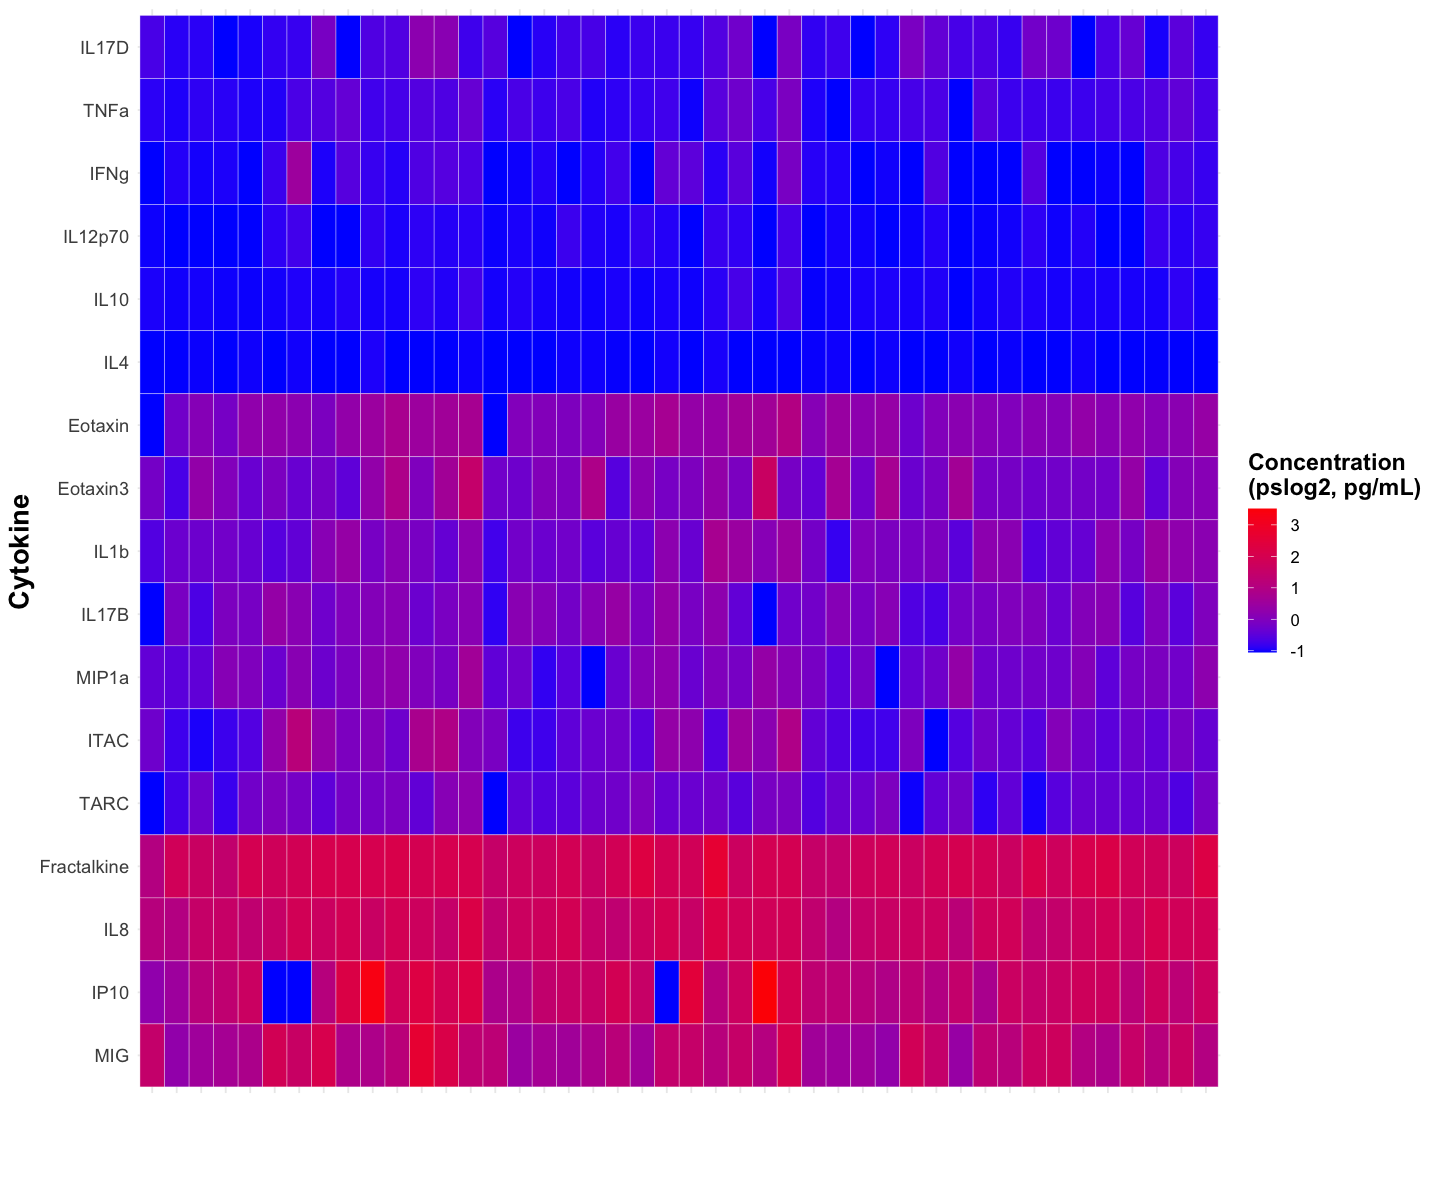

In [6]:
options(repr.plot.width=12, repr.plot.height=10) #changing size

#subject ids ordered by avg cytokine conc
subject_ids = factor(final_df$SubjectID, levels = ordered_avg_subject_ids)

#cytokines ordered by avg cytokine conc in each cluster
Cytokine_ = factor(final_df$Name, levels = ordered_avg_cytokines)

#lastly scaling each cytokine to creating a larger visual difference between the smoking groups
Figure6a = ggplot(data = final_df, aes(x = subject_ids, y = Cytokine_, fill = scale(Conc_pslog2))) + 
  geom_tile(color = "white") + 
  scale_fill_gradient(low = 'blue', high = 'red') + 
  theme_minimal() + 
  theme(axis.text = element_text(size = 11), #changing size of axes labels
        axis.text.x = element_text(angle = 45, hjust = 0.9, color = "white"), #rotating x labels/ moving x labels slightly to the left
        axis.title = element_text(face = "bold", size = rel(1.5)), #changes axis titles
        axis.title.x = element_text(color = "white"),
        #doesn't work with patchwork so I removed this
        #legend.box.spacing = unit(c(1,1,1,1), "cm"), #changes distance between legend and figure
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 10))+ #changes legend text

  labs(x = "Subject ID", y = "Cytokine", fill = "Concentration\n(pslog2, pg/mL)")

Figure6a

# 2nd Heat Map

Heat map visualization of eigencytokines from NLF across all smoking groups to see visual differences between them.

In [7]:
#for the eigencytokines renaming the value to Conc_pslog2 is a bit misleading, but I did it to allow the full join 
#to work
#renaming cluster to name to make the final df
# eigencytokines df and splitting by cluster
eigencytokines_NLF = reshape2::melt(eigencytokines_NLF, variable = "Cluster", value.name = "Eigen_Value")
head(eigencytokines_NLF)

Using SubjectID as id variables



,SubjectID,Cluster,Eigen_Value
,<chr>,<fct>,<dbl>
1,NS_1,ClusterA,-0.3272376
2,NS_10,ClusterA,-0.3419100
3,NS_11,ClusterA,-0.1265206
4,NS_12,ClusterA,-0.1267970
5,NS_13,ClusterA,-0.3183685
6,NS_14,ClusterA,-0.3213186


In [8]:
#eigencytokines df that specifies the cluster they correspond to and splitting by those clusters
eigencytokines_df = inner_join(cytokines %>%
    filter(Compartment == 'NLF'), eigencytokines_NLF)  %>%
    select(SubjectID, Cluster, Group, Eigen_Value) %>%
    # removes duplicate rows
    unique() %>%
    group_by(Group, Cluster) %>%
    group_split

eigencytokines_ClusterA_NS = eigencytokines_df[[7]] %>% 
    select(-Cluster)
eigencytokines_ClusterB_NS = eigencytokines_df[[8]] %>% 
    select(-Cluster)
eigencytokines_ClusterC_NS = eigencytokines_df[[9]] %>% 
    select(-Cluster)
eigencytokines_ClusterA_CS = eigencytokines_df[[1]] %>% 
    select(-Cluster)
eigencytokines_ClusterB_CS = eigencytokines_df[[2]] %>% 
    select(-Cluster)
eigencytokines_ClusterC_CS = eigencytokines_df[[3]] %>% 
    select(-Cluster)
eigencytokines_ClusterA_Ecig = eigencytokines_df[[4]] %>% 
    select(-Cluster)
eigencytokines_ClusterB_Ecig = eigencytokines_df[[5]] %>% 
    select(-Cluster)
eigencytokines_ClusterC_Ecig = eigencytokines_df[[6]] %>% 
    select(-Cluster)
head(eigencytokines_ClusterC_NS)

Joining, by = "SubjectID"



SubjectID,Group,Eigen_Value
<chr>,<chr>,<dbl>
NS_1,NS,0.2175413
NS_2,NS,0.2634276
NS_3,NS,-0.2923103
NS_4,NS,0.1872188
NS_5,NS,0.1348291
NS_6,NS,-0.1806104


In [9]:
#getting subject id's ordered by avg concentrations grouped within smoking groups
ordered_df2 = inner_join(cytokines %>%
    filter(Compartment == 'NLF'), eigencytokines_NLF) %>%
    select(SubjectID, Group, Cluster, Eigen_Value) %>%
    group_by(Group, SubjectID) %>%
    summarize(Avg_Conc = mean(Eigen_Value)) %>%
    arrange(Group, Avg_Conc)

ordered_df2$Group = factor(ordered_df2$Group, levels = c("NS", "CS", "Ecig"))
#factor didn't work so doing it manually
ordered_avg_subject_ids = c(ordered_df2$SubjectID[31:44], ordered_df2$SubjectID[1:13], ordered_df2$SubjectID[14:30])

Joining, by = "SubjectID"

`summarise()` has grouped output by 'Group'. You can override using the `.groups` argument.



In [10]:
final_df2 = inner_join(cytokines %>%
    filter(Compartment == 'NLF'), eigencytokines_NLF)  %>%
    select(SubjectID, Cluster, Group, Eigen_Value) %>%
    # removes duplicate rows
    unique() %>%
    #simplifying cluster name
    mutate(Cluster = ifelse(Cluster == "ClusterA", "Consensus Cluster A", 
           ifelse(Cluster == "ClusterB", "Consensus Cluster B",
           ifelse(Cluster == "ClusterC", "Consensus Cluster C", Cluster))))

head(final_df2)

Joining, by = "SubjectID"



,SubjectID,Cluster,Group,Eigen_Value
,<chr>,<chr>,<chr>,<dbl>
1,NS_1,Consensus Cluster A,NS,-0.3272376
2,NS_1,Consensus Cluster B,NS,0.2721166
3,NS_1,Consensus Cluster C,NS,0.2175413
67,NS_2,Consensus Cluster A,NS,-0.3009171
68,NS_2,Consensus Cluster B,NS,0.0916713
69,NS_2,Consensus Cluster C,NS,0.2634276


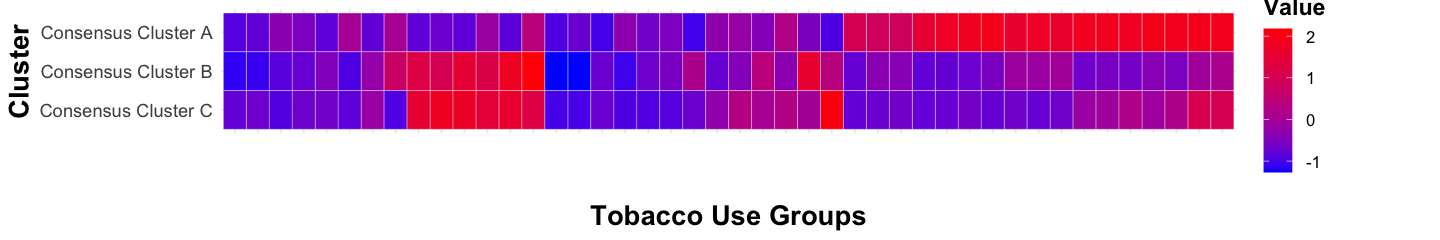

In [11]:
options(repr.plot.width=12, repr.plot.height=2) #changing size

#subject ids ordered by avg cytokine conc
subject_ids2 = factor(final_df2$SubjectID, levels = ordered_avg_subject_ids)

#reversing clusters for heat map
rev_clusters = factor(final_df2$Cluster, levels = c("Consensus Cluster C", "Consensus Cluster B", 
                                                    "Consensus Cluster A"))

#lastly scaling each cytokine to creating a larger visual difference between the smoking groups
Figure6b = ggplot(data = final_df2, aes(x = subject_ids2, y = rev_clusters, fill = scale(Eigen_Value))) + 
  geom_tile(color = "white") + 
  scale_fill_gradient(low = 'blue', high = 'red') + 
  theme_minimal() + 
  theme(axis.text = element_text(size = 11), #changing size of axes labels
        axis.text.x = element_text(angle = 45, hjust = 0.9, color = "white"), #rotating x labels/ moving x labels slightly to the left
        axis.title = element_text(face = "bold", size = rel(1.5)), #changes axis titles
        #doesn't work with patchwork so I removed this
        #legend.box.spacing = unit(c(1,1,1,1), "cm"), #changes distance between legend and figure
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 10))+ #changes legend text

  labs(x = "Tobacco Use Groups", y = "Cluster", fill = "Eigencytokine\nValue")

Figure6b

# Final Figure

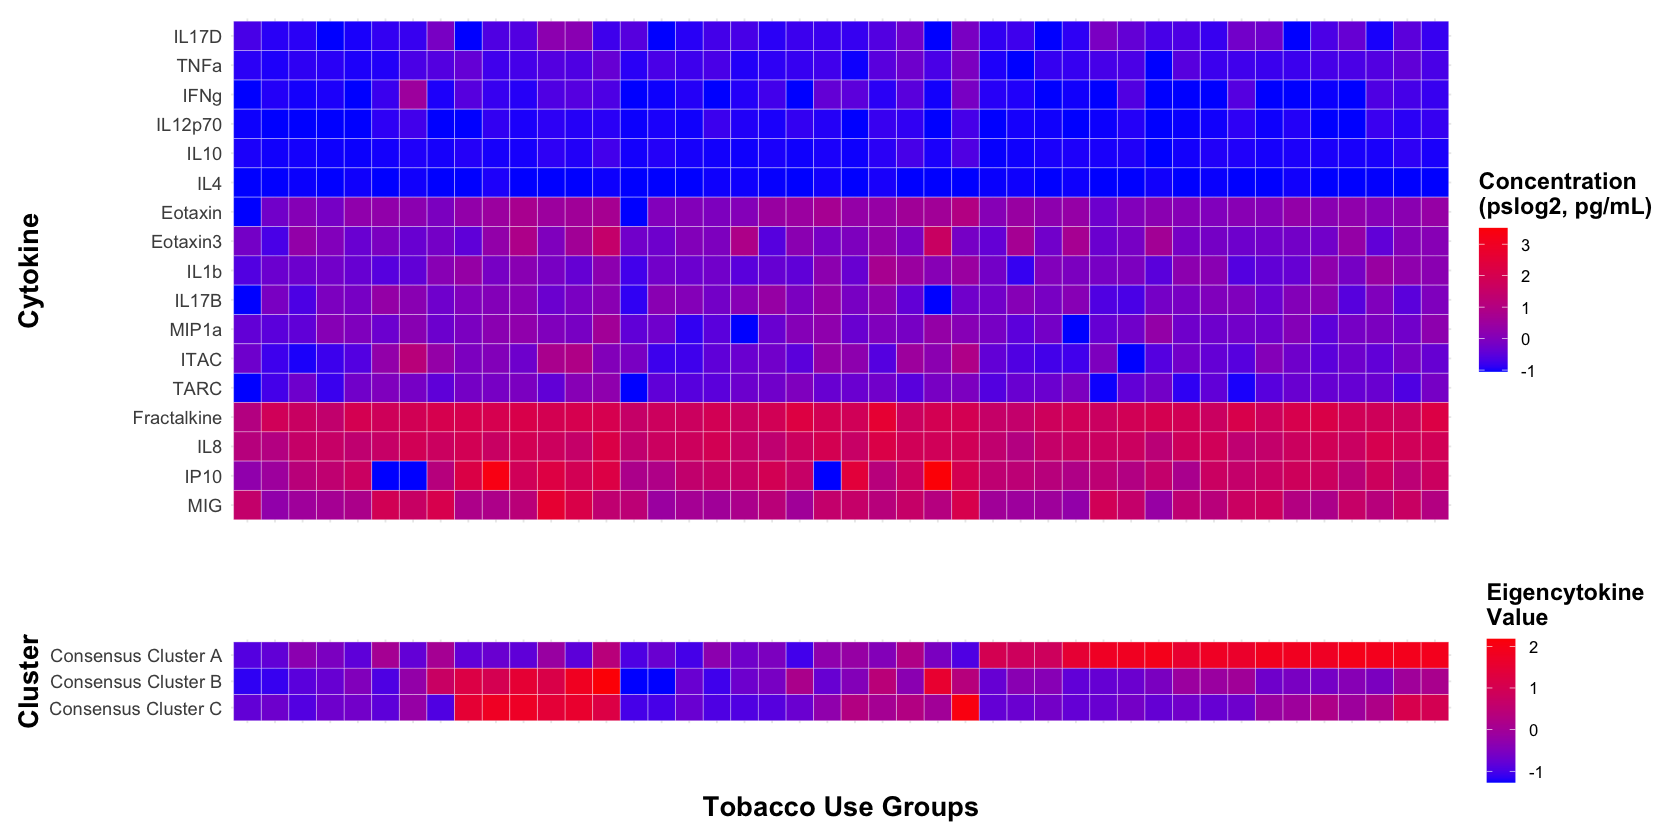

In [12]:
#putting everything together
options(repr.plot.width=14, repr.plot.height=7) #changing size
Figure6 = Figure6a + Figure6b + plot_layout(ncol = 1, height = c(6,1)) #try 12x3
Figure6

In [13]:
ggsave(Figure6, 
       filename = 'Figure6.pdf',
       path = Output,
       width = 14, height = 7)